In [13]:
%matplotlib inline

from __future__ import print_function
import os
import gensim
import subprocess
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import json
from collections import Counter
from itertools import chain

In [3]:
MODEL = 'GoogleNews-vectors-negative300.bin'
if not os.path.isfile(MODEL):
  with open(MODEL, 'wb') as fout:
    path = 'https://s3.amazonaws.com/dl4j-distribution/%s.gz' % MODEL
    curl = subprocess.Popen(['curl', path],
                           stdout=subprocess.PIPE).stdout
    zcat = subprocess.Popen(['zcat'],
                          stdin=curl,
                          stdout=fout
                         )
    zcat.wait()

In [4]:
model = gensim.models.KeyedVectors.load_word2vec_format(MODEL, binary=True)

In [5]:
model.most_similar(positive=['espresso'])

[(u'cappuccino', 0.6888186931610107),
 (u'mocha', 0.6686209440231323),
 (u'coffee', 0.6616827249526978),
 (u'latte', 0.6536752581596375),
 (u'caramel_macchiato', 0.6491267681121826),
 (u'ristretto', 0.6485546827316284),
 (u'espressos', 0.6438628435134888),
 (u'macchiato', 0.6428250074386597),
 (u'chai_latte', 0.6308028697967529),
 (u'espresso_cappuccino', 0.6280542612075806)]

In [6]:
def A_is_to_B_as_C_is_to(a, b, c, topn=1):
  a, b, c = map(lambda x:x if type(x) == list else [x], (a, b, c))
  res = model.most_similar(positive=b + c, negative=a, topn=topn)
  if len(res):
    if topn == 1:
      return res[0][0]
    return [x[0] for x in res]
  return None

A_is_to_B_as_C_is_to('man', 'woman', 'king')

u'queen'

In [7]:
A_is_to_B_as_C_is_to('Germany', 'beer', 'Russia')

u'vodka'

In [8]:
A_is_to_B_as_C_is_to('Germany', 'Berlin', 'France')

u'Paris'

In [9]:
for country in 'Italy', 'France', 'India', 'China':
  print('%s is the capital of %s' % 
        (A_is_to_B_as_C_is_to('Germany', 'Berlin', country), country))

Rome is the capital of Italy
Paris is the capital of France
Delhi is the capital of India
Beijing is the capital of China


In [10]:
for company in 'Google', 'IBM', 'Boeing', 'Microsoft', 'Samsung':
  products = A_is_to_B_as_C_is_to(
    ['Starbucks', 'Apple'], ['Starbucks_coffee', 'iPhone'], company, topn=3)
  print('%s -> %s' % 
        (company, ', '.join(products)))

Google -> personalized_homepage, app, Gmail
IBM -> DB2, WebSphere_Portal, Tamino_XML_Server
Boeing -> Dreamliner, airframe, aircraft
Microsoft -> Windows_Mobile, SyncMate, Windows
Samsung -> MM_A###, handset, Samsung_SCH_B###


In [11]:
beverages = ['Cola', 'Coffee', 'Tea', 'Wine', 'Cappuccino', 'Latte',
             'Ginger Ale', 'Orange Juice', 'Apple Juice', 'Whiskey',
             'Vodka', 'Lager', 'Hefeweizen', 'IPA', 'Grape Juice',
             'Milk', 'Goat Milk', 'Herbal Tea']
len(beverages)

18

In [12]:
normalized = [beverage.lower().replace(' ', '_').replace('-', '_') 
              for beverage in beverages]
beverage_vectors = [(beverage, model[norm]) 
                    for beverage, norm in zip(beverages, normalized) 
                    if norm in model]
len(beverage_vectors)

18

In [14]:
vectors = np.asarray([x[1] for x in beverage_vectors])
lengths = np.linalg.norm(vectors, axis=1)
vectors = (vectors.T / lengths).T

tsne = TSNE(n_components=2, perplexity=10, verbose=2).fit_transform(vectors)

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 17 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 18 / 18
[t-SNE] Mean sigma: 0.422394
[t-SNE] Iteration 25: error = 1.0984172, gradient norm = 0.0022056
[t-SNE] Iteration 50: error = 1.0353470, gradient norm = 0.0020307
[t-SNE] Iteration 75: error = 0.8049616, gradient norm = 0.0019073
[t-SNE] Iteration 100: error = 0.6989675, gradient norm = 0.0019135
[t-SNE] KL divergence after 100 iterations with early exaggeration: 0.698967
[t-SNE] Iteration 125: error = 0.5171531, gradient norm = 0.0013886
[t-SNE] Iteration 150: error = 0.4698668, gradient norm = 0.0010943
[t-SNE] Iteration 175: error = 0.4601213, gradient norm = 0.0010549
[t-SNE] Iteration 200: error = 0.4576006, gradient norm = 0.0010453
[t-SNE] Iteration 225: error = 0.4570842, gradient norm = 0.0010430
[t-SNE] Iteration 250: error = 0.4568935, gradient norm = 0.0010423
[t-SNE] Iteration 275: error = 0.4568405, gradient norm = 0.0010421
[t-SN

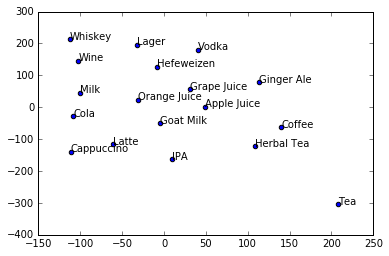

In [17]:
x=tsne[:,0]
y=tsne[:,1]

fig, ax = plt.subplots()
ax.scatter(x, y)

for bev, x1, y1 in zip(beverage_vectors, x, y):
    ax.annotate(bev[0], (x1, y1))

plt.show()

In [74]:
x.min(), x.max()

(-0.00019134512304018101, 0.00024896834982487265)

In [86]:
model.most_similar(positive=['tea',], topn=10)

[(u'Tea', 0.7009036540985107),
 (u'teas', 0.6727380156517029),
 (u'shape_Angius', 0.632348358631134),
 (u'activist_Jamie_Radtke', 0.58638596534729),
 (u'decaffeinated_brew', 0.5839536190032959),
 (u'planter_bungalow', 0.575829029083252),
 (u'herbal_tea', 0.5731173753738403),
 (u'coffee', 0.5635291934013367),
 (u'jasmine_tea', 0.548339307308197),
 (u'Tea_NASDAQ_PEET', 0.5402544736862183)]

In [100]:
tweets = json.load(open('condensed_2017.json'))
tokenized = [list(gensim.utils.tokenize(tweet['text'])) for tweet in tweets]

In [105]:
word_counts = Counter(chain(*tokenized))
word_weights = {word: 1.0 / weight for word, weight in word_counts.items()}
[(x[0], word_weights[x[0]]) for x in word_counts.most_common(10)]

[(u'the', 0.0013812154696132596),
 (u'to', 0.002066115702479339),
 (u'and', 0.00267379679144385),
 (u't', 0.002717391304347826),
 (u'of', 0.0030959752321981426),
 (u'https', 0.0031847133757961785),
 (u'co', 0.003257328990228013),
 (u'in', 0.003663003663003663),
 (u'a', 0.00411522633744856),
 (u'is', 0.004273504273504274)]

In [128]:
def tweet_vector(tweet):
  res = None
  weight = 0
  for word in tweet:
    if not word in model:
      continue
    vector = model[word] * word_weights[word]
    if res is None:
      res = vector
    else:
      res += vector
  if np.linalg.norm(res) == 0:
    return None # No real information
  return res / np.linalg.norm(res)

tweet_vectors = [tweet_vector(tweet) for tweet in tokenized]

In [133]:
usuable_tweets = []
usuable_vectors = []
for tweet, vector in zip(tweets, tweet_vectors):
  if not vector is None:
    usuable_tweets.append(tweet['text'])
    usuable_vectors.append(vector)
usuable_vectors = np.asarray(usuable_vectors)

In [142]:
def closest(word):
  dists = np.dot(usuable_vectors, model[word])
  return np.argsort(dists)[-10:]

word = 'music'
print('Matches for: %s' % word)
print('---')
for other_idx in closest(word):
  print(usuable_tweets[other_idx])

Matches for: music
---
Great parent-teacher listening session this morning with @VP Pence &amp; @usedgov Secretary @BetsyDeVos. Watch:… https://t.co/nuLTs513Ot
My statement as to what's happening in Sweden was in reference to a story that was broadcast on @FoxNews concerning immigrants &amp; Sweden.
Is it true the DNC would not allow the FBI access to check server or other equipment after learning it was hacked? Can that be possible?
Join me live at 9:00 P.M. 
#JointAddress https://t.co/J882zbyVkJ https://t.co/gTtK3vJmkU
Join me live from the @WhiteHouse.
https://t.co/LHOs4nAaGl
Join me live at the @WhiteHouse.

➡️https://t.co/9VOb99W42r https://t.co/sjb5VHLHYH
Looking forward to a big rally in Nashville, Tennessee, tonight. Big crowd of great people expected. Will be fun!
Nancy Pelosi and Fake Tears Chuck Schumer held a rally  at the steps of The Supreme Court and mic did not work (a mess)-just like Dem party!
Great Concert at 4:00 P.M. today at Lincoln Memorial. Enjoy!
Jackie Evancho

In [137]:
np.dot([usuable_vectors[tweet_idx]], usuable_vectors[tweet_idx])

array([ 1.00000012], dtype=float32)

In [18]:
vectors

array([[-0.06258024, -0.02259842,  0.00987693, ...,  0.07553878,
         0.03745333,  0.03729529],
       [-0.05390024, -0.04573354, -0.12478722, ...,  0.0220501 ,
         0.07284699,  0.0676203 ],
       [-0.06273787,  0.03928446, -0.01487826, ...,  0.10612667,
         0.02154782,  0.10143599],
       ..., 
       [-0.02361988,  0.04283071, -0.00225373, ...,  0.07684333,
         0.03054837, -0.08188223],
       [ 0.00513691, -0.06047985, -0.01602458, ...,  0.0267507 ,
         0.07185213,  0.03928606],
       [-0.09418097, -0.03064828, -0.00470247, ...,  0.14100839,
         0.07313494,  0.0799749 ]], dtype=float32)